In [3]:
#!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import uuid
import os
import time 

c:\Users\My_Laptop\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#model = torch.hub.load("ultralytics/yolov5","yolov5s")
model = torch.hub.load('.', 'custom', path='yolov5s.pt', source='local') 
model

In [6]:
img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg'


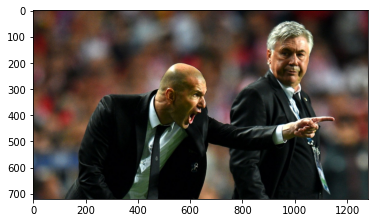

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
a = plt.imread(img, format= "jpg")
im = plt.imshow(a)
plt.show()

In [8]:
result = model(img)
result.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1368.9ms pre-process, 524.6ms inference, 7.0ms NMS per image at shape (1, 3, 384, 640)


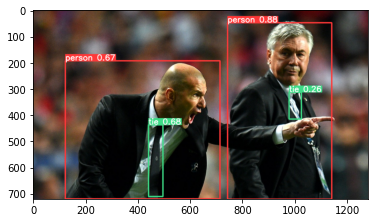

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()
#result.show()

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _,frame = cap.read()
     #Make dectections
    results = model(frame)
    cv2.imshow('Webcam detect',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Training from scratch 

In [18]:
images_path = os.path.join('data','images')
labels = ['Handsome', 'Glasses', 'Mask']
number_imgs = 30

In [15]:
cap= cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(6)

    #Loop through img range
    for img_num in range(number_imgs):
        print("Collecting {} - for {} class".format(img_num, label))

        #Webcame feed
        ret,frame = cap.read()
        imgname = os.path.join(images_path, label + "." + str(img_num) + ".jpg")
        cv2.imwrite(imgname, frame)
        cv2.imshow("Collecting this image . . .", frame)
        time.sleep(1)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()



Load the tool to gen Yolo dataset format

In [21]:
#!git clone http://github.com/tzutalin/labelImg
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Train model


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

In [24]:
import pandas as pd
df = pd.read_csv('yolov5\\runs\\train\\exp\\results.csv')
df[0:2]


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.12105,0.014505,0.079479,0.005908,...,0.010791,0.050528,0.095500,0.000500,0.000500
1,1,0.10608,0.019062,0.077071,0.004409,...,0.012826,0.048862,0.090098,0.001098,0.001098


In [28]:
m = df.columns.ravel()
m

array(['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1',
       '               x/lr2'], dtype=object)

In [30]:
epoch = df[m[0]].tolist()
train_box_loss = df[m[1]].tolist()
train_obj_loss = df[m[2]].tolist()
val_box_loss = df[m[8]].tolist()
val_obj_loss = df[m[9]].tolist()


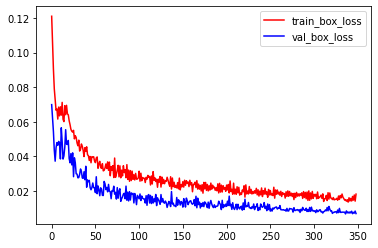

In [31]:
plt.plot(epoch,train_box_loss, color = 'red', label = 'train_box_loss')
plt.plot(epoch,val_box_loss, color = 'blue', label = 'val_box_loss')
plt.legend()
plt.show()


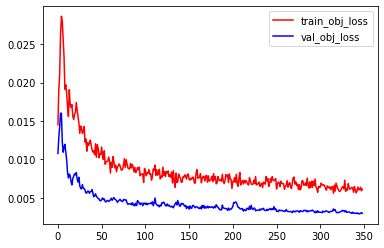

In [32]:
plt.plot(epoch,train_obj_loss, color = 'red', label = 'train_obj_loss')
plt.plot(epoch,val_obj_loss, color = 'blue', label = 'val_obj_loss')
plt.legend()
plt.show()

In [16]:
# after 350 epochs (~40mins)
model_test = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp/weights/best.pt')

Using cache found in C:\Users\My_Laptop/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-5 Python-3.6.7 torch-1.7.0 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 


WARNING  Python 3.7.0 is required by YOLOv5, but Python 3.6.7 is currently installed


Model summary: 157 layers, 7058671 parameters, 0 gradients
Adding AutoShape... 


In [17]:
img = os.path.join('data\images\Glasses.27.jpg')
results = model_test(img)
results.print()

image 1/1: 720x1280 1 Handsome
Speed: 11.0ms pre-process, 49.9ms inference, 5.0ms NMS per image at shape (1, 3, 384, 640)


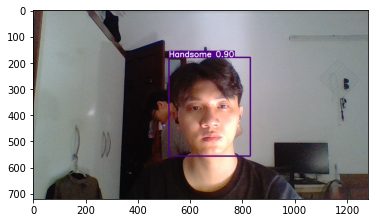

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [20]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results_ = model_test(frame)
    results__ = cv2.cvtColor(np.squeeze(results_.render()), cv2.COLOR_RGB2BGR)
    cv2.imshow("Live predict . . .", results__)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
